In [129]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [130]:
x1 = np.random.normal(0, 5, 1000)
x2 = np.random.normal(0, 1, 1000)

In [131]:
df = pd.DataFrame({
    'x1': x1, 
    'x2': x2
})

<AxesSubplot:xlabel='x1', ylabel='x2'>

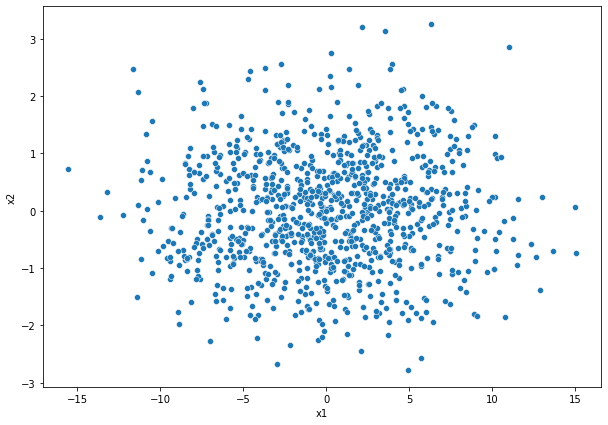

In [132]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x='x1', y='x2', data=df)

In [133]:
def mahalanobis_distance(p, q, df):
    A = p - q
    B = (p - q).T
    covariance_matrix = np.array(df.cov())
    inverse_covariance_matrix = np.linalg.inv(covariance_matrix)
    return np.dot(np.dot(A, inverse_covariance_matrix), B)

In [134]:
def euclidean_distance(p, q):
    return np.sqrt(np.sum((p - q) ** 2))

In [135]:
df

,x1,x2
0,-2.141247,-0.933121
1,-9.373075,-0.296486
2,1.900094,0.743995
3,2.224471,-1.683492
4,3.867086,-0.730290
...,...,...
995,-2.652305,0.068122
996,-2.403323,-0.247858
997,-0.607241,-0.302280
998,-8.249036,0.629625


In [136]:
x1_min_arg = x1[np.argsort(x1)[0]]
x1_max_arg = x1[np.argsort(x1)[-1]]
x2_min_arg, x2_max_arg = x2[np.where((x2 > np.mean(x2) - .2) & (x2 < np.mean(x2) + .2))[0][0:2]]

<AxesSubplot:xlabel='x1', ylabel='x2'>

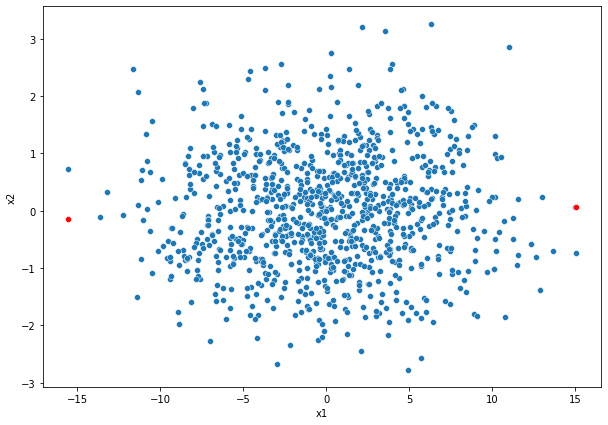

In [137]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x='x1', y='x2', data=df)
sns.scatterplot(x=[x1_min_arg, x1_max_arg], y=[x2_min_arg, x2_max_arg], color='red')

In [138]:
p = np.array([[x1_min_arg, x2_min_arg]])
q = np.array([[x1_max_arg, x2_max_arg]])

In [139]:
euclidean_distance(p, q)

30.56771183303908

In [140]:
mahalanobis_distance(p, q, df)

array([[37.21900738]])

In [141]:
filepath = 'https://raw.githubusercontent.com/selva86/datasets/master/diamonds.csv'
df = pd.read_csv(filepath).iloc[:, [0,4,6]]

In [145]:
df.head(3)

,carat,depth,price
0,0.23,61.5,326
1,0.21,59.8,326
2,0.23,56.9,327


In [146]:
df.iloc[11].values

array([2.30e-01, 6.28e+01, 3.40e+02])

In [147]:
mahalanobis_distance(df.iloc[10].values, df.iloc[11].values, df)

0.7919318634752806